In [1]:
%pylab inline
from astropy import constants as const
from astropy import units as u

Populating the interactive namespace from numpy and matplotlib


In [4]:
#1 (a) for planetary albedo of .3

const.sigma_sb
T_sun = 5777*u.K 
A = .3
flux = const.sigma_sb * (T_sun)**4.0
Luminosity = 4.0 * np.pi * const.R_sun**2.0 * flux
flux_in = Luminosity/ (4*np.pi*(1.5e11*u.m)**2.0)
energy_in = flux_in*(np.pi*const.R_earth**2.0)*(1-A)
flux_out = energy_in/(4*np.pi*const.R_earth**2.0)
T_earth = (flux_out/const.sigma_sb)**(1.0/4.0)
T_earth

<Quantity 254.4294124817241 K>

In [25]:
#(b) assuming greenhouse effect for (1-A) reabsorbtion

const.sigma_sb
T_sun = 5777*u.K 
A = .3
flux = const.sigma_sb * (T_sun)**4.0
Luminosity = 4.0 * np.pi * const.R_sun**2.0 * flux
flux_in = Luminosity/ (4*np.pi*(1.5e11*u.m)**2.0)
energy_in = flux_in*(np.pi*const.R_earth**2.0)*(1-A)
flux_out = energy_in/(4*np.pi*const.R_earth**2.0)*(1.7)
T_earth = (flux_out/const.sigma_sb)**(1.0/4.0)
T_earth


<Quantity 290.5223479664891 K>

In [8]:
#(c)
def T(Lambda):
    return ((((1.0-(Lambda))*(flux_in))/(4.0))/(const.sigma_sb))**(1.0/4.0)

Albedo = 0.30



#(d) 
Increased concentration of greenhouse gasses results in an increase in trapped infrared radiation. The most prominent of the gasses is water, which absorbs radiation over a large spectrum of longer wavelengths. This is not as problematic as CO2 because the amount of water vapor is not increasing as much as CO2.

In [ ]:
#(e) Yes we are in trouble.

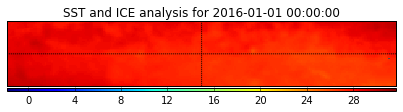

In [14]:
#2(a)

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime




date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-150.,llcrnrlat=-5.,urcrnrlon=-90.,urcrnrlat=5.,
           projection='mill',lon_0=0,
          resolution =None)

# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

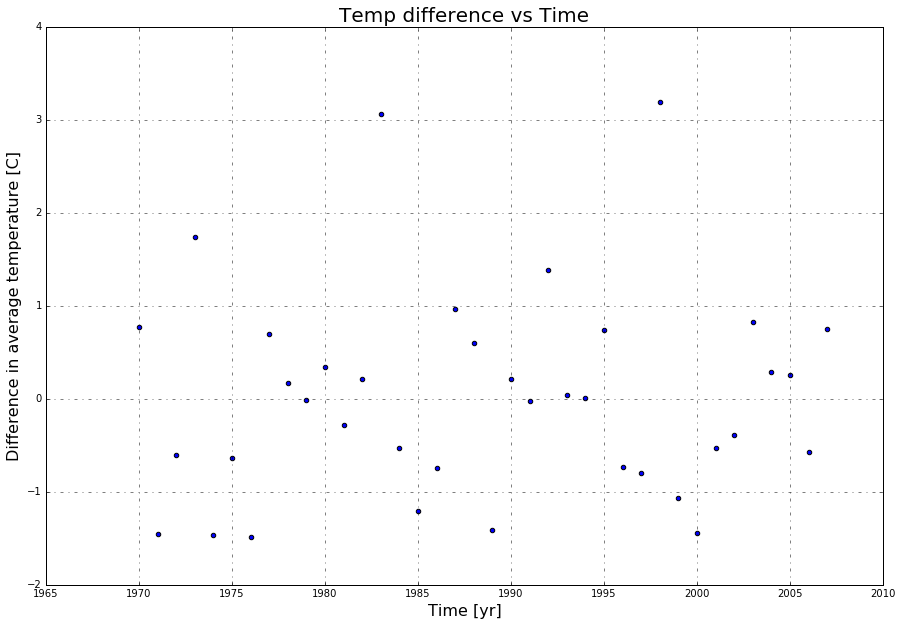

In [18]:
data = np.loadtxt("calidata_final.dat")
nino3 = data[:,4]
years = data[:,0]

plt.figure(figsize=(15,10))
plt.scatter(years, nino3)
plt.grid(True,linestyle="-.")
plt.xlabel('Time [yr]',fontsize=16)
plt.ylabel('Difference in average temperature [C]', fontsize=16)
plt.title('Temp difference vs Time',fontsize=20)

In [19]:
#(c) The five largest El Nino events were in 1973, 1983, 1987, 1992, and 1998

In [20]:
#(d) The El Nino years sometimes correspond to extreme weather but it is
# not always the case.

array([[  1.97000000e+03,   6.94305000e+00,   3.97662400e+02,
         -9.90000000e+01,   7.70000000e-01],
       [  1.97100000e+03,   5.28360000e+00,   2.28904800e+02,
         -9.90000000e+01,  -1.45000000e+00],
       [  1.97200000e+03,   4.62315000e+00,   2.26339400e+02,
         -9.90000000e+01,  -6.00000000e-01],
       [  1.97300000e+03,   4.48440000e+00,   3.66293400e+02,
         -9.90000000e+01,   1.74000000e+00],
       [  1.97400000e+03,   5.61660000e+00,   2.89560000e+02,
         -9.90000000e+01,  -1.46000000e+00],
       [  1.97500000e+03,   5.20035000e+00,   2.67538200e+02,
         -9.90000000e+01,  -6.40000000e-01],
       [  1.97600000e+03,   6.46020000e+00,   1.37033000e+02,
         -9.90000000e+01,  -1.49000000e+00],
       [  1.97700000e+03,   6.27705000e+00,   1.02819200e+02,
         -9.90000000e+01,   7.00000000e-01],
       [  1.97800000e+03,   7.14285000e+00,   4.93420400e+02,
         -9.90000000e+01,   1.70000000e-01],
       [  1.97900000e+03,   4.1791500

In [24]:
temp = data[:,1]
precip = data[:,2]
snow = data[:,3]

temperature = np.corrcoef(nino3, temp, rowvar=False, bias=True)
precipitation = np.corrcoef(nino3, precip, rowvar=False, bias=True)
snowdepth = np.corrcoef(nino3, snow, rowvar=False, bias=True)

print "Temperature correlation = %.4f" % temperature[1,0]
print "Precipitation correlation = %.4f" % precipitation[1,0]
print "Snow corr = %.4f" % snowdepth[1,0]


Temperature correlation = 0.0051
Precipitation correlation = 0.3771
Snow corr = 0.1420


In [ ]:
# This suggests that ENSO doesn't correlate with temperature but has a 
# slight correlation with precipitation and less so with snow.
# this seems consistant with the intro maps.

In [ ]:
#f The graphic shows a warm temperatures moving to the north west. We are in
# a warm event.